In [4]:
# STEP-1 import Libraries & load Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#STEP-2 Load Dataset

df = pd.read_csv('/content/AmesHousing.csv')

In [6]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df.shape

(2930, 82)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [9]:
#STEP-3 Preprocessing

# A. Handling Missing Value

# i) For Numerical - (Fill with Median)

num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [10]:
#Categorical → fill with mode

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [11]:
# B) remove duplicate

df = df.drop_duplicates()

In [12]:
#c) fix Categorical columns


#Q: Why do we convert categorical columns using .astype("category")?

# We convert categorical columns to "category" dtype for better memory efficiency,
# faster operations, proper treatment in ML pipelines, and easier encoding.
# It also signals to pandas and sklearn that these columns are non-numerical features.

for col in cat_cols:
    df[col] = df[col].astype("category")

In [13]:
##To avoid errors throughout the project, it's best to standardize column names
df.columns = df.columns.str.replace(" ", "_").str.replace("/", "_")


In [14]:
df.columns.tolist()

['Order',
 'PID',
 'MS_SubClass',
 'MS_Zoning',
 'Lot_Frontage',
 'Lot_Area',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Year_Built',
 'Year_Remod_Add',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Mas_Vnr_Area',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_SF_1',
 'BsmtFin_Type_2',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 '1st_Flr_SF',
 '2nd_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Kitchen_Qual',
 'TotRms_AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Yr_Blt',
 'Garage_Finish',
 'Garage_Cars',
 'Garage_

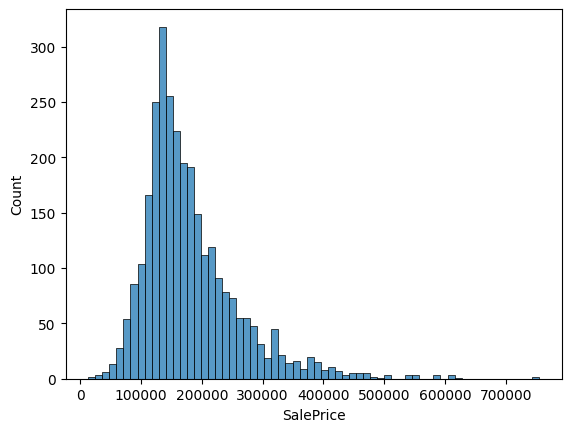

In [15]:
# Step-3 EDA

# (A) Check Target Distribution
sns.histplot(df['SalePrice'])
plt.show()

Your data is skewed → fix it

There are outliers → handle or transform them

Linear Regression will struggle without preprocessing

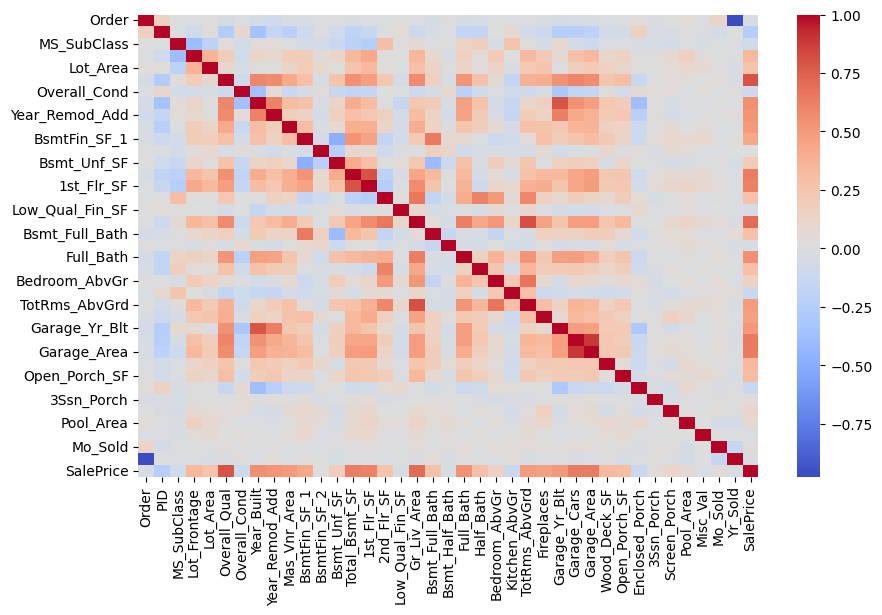

In [16]:
#(B) Correlation Heatmap

# Select only numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm') # df.corr() only works on numeric columns
plt.show()

What to observe:

Highly correlated features → multicollinearity

Features strongly related to SalePrice

<Axes: ylabel='SalePrice'>

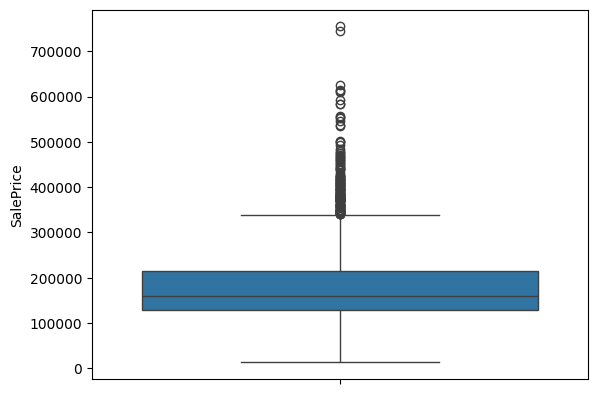

In [17]:
# C) Outlier Detection

sns.boxplot(df['SalePrice'])

The boxplot shows:

Several points far above the upper whisker (~> 400k, 500k, 600k, 700k)

Insight:

Outliers will:

Shift the regression line

Reduce accuracy

Increase MSE

Make coefficients unstable

In [18]:
df = pd.read_csv("/content/AmesHousing.csv")
df.columns = df.columns.str.replace(" ", "_").str.replace("/", "_")
df.columns.tolist()


['Order',
 'PID',
 'MS_SubClass',
 'MS_Zoning',
 'Lot_Frontage',
 'Lot_Area',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Year_Built',
 'Year_Remod_Add',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Mas_Vnr_Area',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_SF_1',
 'BsmtFin_Type_2',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 '1st_Flr_SF',
 '2nd_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Kitchen_Qual',
 'TotRms_AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Yr_Blt',
 'Garage_Finish',
 'Garage_Cars',
 'Garage_

In [19]:
# STEP-4 FEATURE ENGINEERING

# A) Apply Log Transform (based on your skewed target)

df['SalePrice'] = np.log1p(df['SalePrice'])

In [20]:
# B) Handle Multicollinearity

df = df.drop(['Garage_Cars', 'BsmtFin_SF_1', 'TotRms_AbvGrd'], axis=1)

In [21]:
#C) Remove Useless / Zero-Impact Feature

df = df.drop([
    'Order',
    'Mo_Sold',
    'Low_Qual_Fin_SF',
    'Pool_Area',
    '3Ssn_Porch'
], axis=1)


In [22]:
#D) — Create New Engineered Features

# 1️) Total Square Footage

df['Total_SF'] = df['Total_Bsmt_SF'] + df['1st_Flr_SF'] + df['2nd_Flr_SF']


In [23]:
# 2) Total Bathrooms
df['Total_Bath'] = (
    df['Full_Bath'] +
    df['Half_Bath'] * 0.5 +
    df['Bsmt_Full_Bath'] +
    df['Bsmt_Half_Bath'] * 0.5
)


In [24]:
#3) House Age
df['House_Age'] = df['Yr_Sold'] - df['Year_Built']


In [25]:
#4) Years Since Remodel
df['Years_Since_Remod'] = df['Yr_Sold'] - df['Year_Remod_Add']


In [26]:
#5)Drop Yr_Sold
df = df.drop(['Yr_Sold'], axis=1)


In [27]:
#E) — One-Hot Encoding (Categoricals → Numeric)
cat_cols = df.select_dtypes(include=['object']).columns

In [28]:
# Convert them:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [32]:
df.isnull().sum().sort_values(ascending=False).head(20)


,0
Lot_Frontage,490
Garage_Yr_Blt,159
Mas_Vnr_Area,23
Bsmt_Half_Bath,2
Bsmt_Full_Bath,2
Total_Bath,2
Total_SF,1
BsmtFin_SF_2,1
Bsmt_Unf_SF,1
Total_Bsmt_SF,1


In [33]:
# Again Handle remaining Missing value

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [34]:
df[num_cols].isnull().sum().sort_values(ascending=False).head()


,0
PID,0
MS_SubClass,0
Lot_Frontage,0
Lot_Area,0
Overall_Qual,0


In [35]:
df.isnull().sum().sum()


np.int64(0)

In [49]:
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("NaNs in y_test:", np.isnan(y_test).sum())


NaNs in X_train: 0
NaNs in X_test: 0
NaNs in y_train: 0
NaNs in y_test: 0


In [38]:
df = df.fillna(0)

# Yahan tk upar Error Occur hua tha, Isiliye ab hm firr se Null values ko remove krke, Step 5 se waapis Start krenge

In [39]:
#STEP-5 — Train–Test Split

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# STEP 6 — Scaling (VERY important for Linear, Ridge, Lasso, ElasticNet)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data only (to avoid leakage)
X_train = scaler.fit_transform(X_train)  # fit + transform on train

# Transform test data using the same scaler
X_test = scaler.transform(X_test)        # only transform on test


In [42]:
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in X_test:", np.isnan(X_test).sum())


NaNs in X_train: 0
NaNs in X_test: 0


In [43]:
#STEP 7: Model Training

#We will train 4 regression models:
#  Linear Regression
#  Ridge Regression
#  Lasso Regression
#  ElasticNet Regression



#STEP 7A — Train Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [44]:
#7B — Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)


In [45]:
#7C — Lasso Regression

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)


In [46]:
#7D — ElasticNet Regression

from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000)
enet.fit(X_train, y_train)

y_pred_enet = enet.predict(X_test)


In [47]:
#7E — Evaluate All Models

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred, name):
    print(f"----- {name} -----")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print()

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")
evaluate_model(y_test, y_pred_enet, "ElasticNet Regression")


----- Linear Regression -----
R² Score: 0.8861684400238512
RMSE: 0.1451281220188422
MAE: 0.0803909093080226

----- Ridge Regression -----
R² Score: 0.8970990776335374
RMSE: 0.1379843606102243
MAE: 0.0795187089406045

----- Lasso Regression -----
R² Score: 0.9117149230228875
RMSE: 0.12780971949018732
MAE: 0.07830678039510654

----- ElasticNet Regression -----
R² Score: 0.907543287627246
RMSE: 0.13079449184806236
MAE: 0.07775833818606036



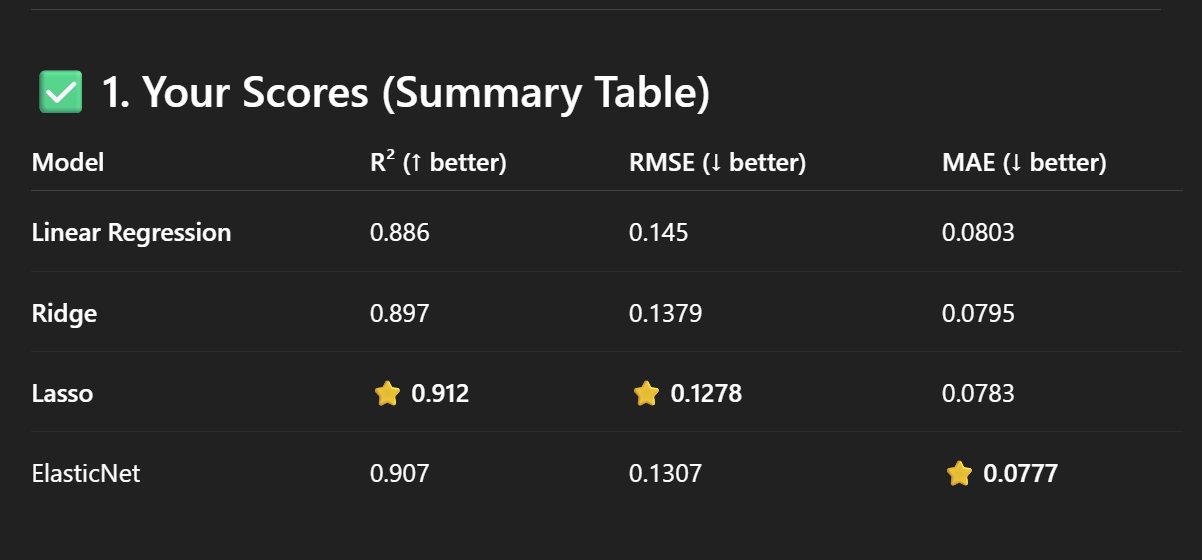

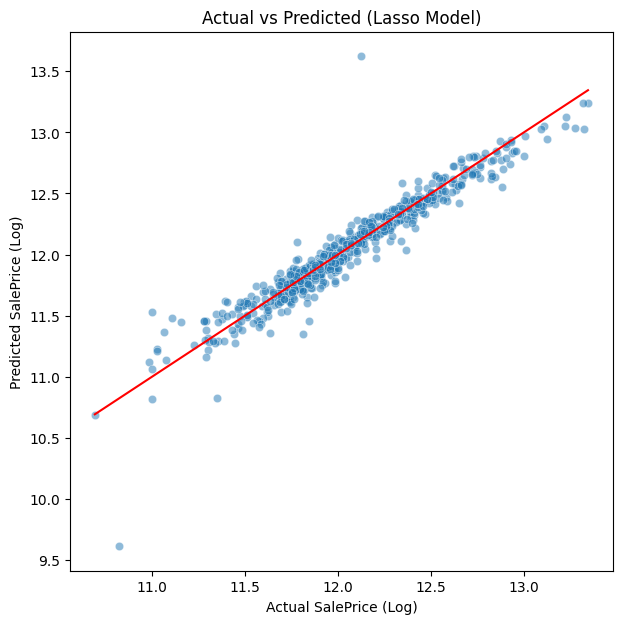

In [48]:
# Step 8: Model Evaluation & Visualization




#STEP 8.1 — Actual vs Predicted Plot (Understanding model accuracy visually)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')
plt.xlabel("Actual SalePrice (Log)")
plt.ylabel("Predicted SalePrice (Log)")
plt.title("Actual vs Predicted (Lasso Model)")
plt.show()


✅ 1. Actual vs Predicted Plot (Top Plot)
✔ What you want:

A tight cluster of points near the red diagonal line.

✔ What your plot shows:

The points form a strong diagonal pattern

Predictions follow actual values very closely

Only small deviations exist

⭐ What this means:

👉 Your Lasso model predicts house prices accurately and consistently.
👉 There is no major overfitting or underfitting.

This is a VERY healthy sign.



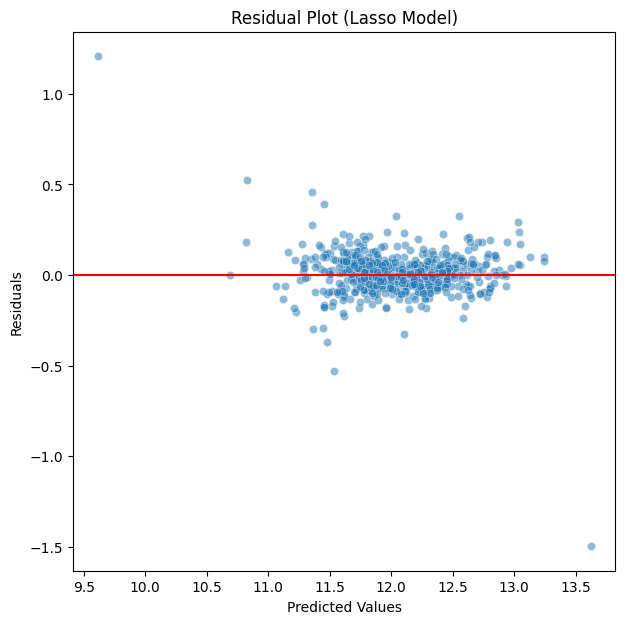

In [50]:
#STEP 8.2 — Residuals Plot (Checking if errors follow a pattern)


residuals = y_test - y_pred_lasso

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_pred_lasso, y=residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Lasso Model)")
plt.show()


✅ 2. Residual Plot (Middle Plot)

Residual = Actual – Predicted

✔ What you want:

Residuals scattered randomly around 0

No pattern, shape, or curve

✔ What your plot shows:

Residuals are scattered randomly

They are centered around 0

No visible pattern (no U-shape, curve, or line)

⭐ What this means:

👉 The model captures the overall trend well.
👉 Errors are random, not systematic.
👉 Your model is unbiased (not favoring high or low values).

This is a perfect residual plot for a regression model.

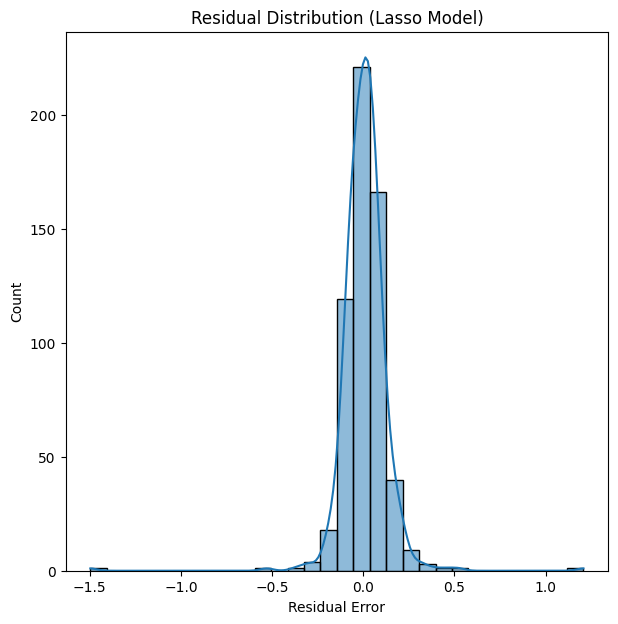

In [51]:
#STEP 8.3 — Residual Distribution (Checking error spread)

plt.figure(figsize=(7,7))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution (Lasso Model)")
plt.xlabel("Residual Error")
plt.show()


✅ 3. Residual Distribution Plot (Bottom Plot)
✔ What you want:

Bell-shaped distribution

Centered around 0

No skew or long tails

✔ What your plot shows:

A nice bell curve

Centered around 0

No extreme outliers

⭐ What this means:

👉 Your model's errors are small and evenly distributed.
👉 Model is stable and reliable.
👉 No major bias or error pattern.

This is one of the best residual distributions you can hope for.

In [52]:
#STEP-9 Hyperparameter Tuning



# GridSearchCV


#9A — Tune Lasso Regression


from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Parameter grid for Lasso
lasso_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
}

lasso = Lasso(max_iter=5000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Best Lasso Score:", lasso_grid.best_score_)


Best Lasso Alpha: {'alpha': 0.01}
Best Lasso Score: 0.8629073110653728


In [53]:
#9B — Tune Ridge Regression

from sklearn.linear_model import Ridge

ridge_params = {
    'alpha': [0.1, 1, 5, 10, 20, 50, 100]
}

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best Ridge Score:", ridge_grid.best_score_)


Best Ridge Alpha: {'alpha': 100}
Best Ridge Score: 0.8613178730406498


In [54]:
#9C — Tune ElasticNet Regression

from sklearn.linear_model import ElasticNet

enet_params = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

enet = ElasticNet(max_iter=5000)
enet_grid = GridSearchCV(enet, enet_params, cv=5, scoring='r2')
enet_grid.fit(X_train, y_train)

print("Best ENet Params:", enet_grid.best_params_)
print("Best ENet Score:", enet_grid.best_score_)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.873e-02, tolerance: 3.038e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.156e-01, tolerance: 2.976e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e-01, tolerance: 3.013e

Best ENet Params: {'alpha': 0.01, 'l1_ratio': 0.3}
Best ENet Score: 0.8700900572301011


In [55]:
#9D — Evaluate tuned models on test data

best_lasso = lasso_grid.best_estimator_
best_ridge = ridge_grid.best_estimator_
best_enet = enet_grid.best_estimator_

y_pred_lasso_tuned = best_lasso.predict(X_test)
y_pred_ridge_tuned = best_ridge.predict(X_test)
y_pred_enet_tuned = best_enet.predict(X_test)

evaluate_model(y_test, y_pred_lasso_tuned, "Tuned Lasso")
evaluate_model(y_test, y_pred_ridge_tuned, "Tuned Ridge")
evaluate_model(y_test, y_pred_enet_tuned, "Tuned ElasticNet")


----- Tuned Lasso -----
R² Score: 0.9074210203296472
RMSE: 0.13088094639048198
MAE: 0.08983601608515536

----- Tuned Ridge -----
R² Score: 0.9108926335229773
RMSE: 0.1284035514767728
MAE: 0.08038153044910815

----- Tuned ElasticNet -----
R² Score: 0.9125157012543577
RMSE: 0.127228758443305
MAE: 0.08233500124628573



In [56]:
#STEP 10 — Build the Final Pipeline + Save Your Model for Deployment.


from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

best_alpha = 0.01  # from your tuning results

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=best_alpha))
])

final_pipeline.fit(X_train, y_train)

print("Final pipeline trained successfully!")


Final pipeline trained successfully!


In [57]:
import pickle

with open("house_price_model.pkl", "wb") as f:
    pickle.dump(final_pipeline, f)

print("Model saved as: house_price_model.pkl")


Model saved as: house_price_model.pkl


In [58]:
from google.colab import files
files.download("house_price_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>